**Chapter 6 – Decision Trees**

# 1. Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# 2. Making Predictions
**root node** (depth 0, at the top)  
**leaf node** (i.e., it does not have any children nodes)  
*One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.*  
**value** A node’s value attribute tells you how many training instances of each class this node applies to  
**gini** a node’s gini attribute measures its impur‐ ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.

**Equation 6-1: Gini impurity**

$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$


*【Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two chil‐ dren.*

![](https://tva1.sinaimg.cn/large/006y8mN6gy1g92g394c8kj310w0g2q3o.jpg)

**white box models**  are fairly intuitive and their decisions are easy to interpret  (Decision Trees)  
**black box models**  make great predictions, and you can easily check the calculations that they performed to make these predictions  (Random Forests or neural networks)


# 3. Estimating Class Probabilities
first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

0% for Iris-Setosa (0/54)  
90.7% for Iris-Versicolor (49/54)  
9.3% for Iris-Virginica (5/54).

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

it should output Iris-Versicolor (class 1) since it has the highest probability

# 4. The CART Training Algorithm
**algorithm**  
first splits the training set in two subsets using a single feature k and a threshold tk (e.g., “petal length ≤ 2.45 cm”).   
It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).   


**Equation 6-2: CART cost function for classification**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{where }\begin{cases}
G_\text{left/right} \text{ measures the impurity of the left/right subset,}\\
m_\text{left/right} \text{ is the number of instances in the left/right subset.}
\end{cases}
\end{split}
$  

**stop**  
It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.

**the CART algorithm is a greedy algorithm**    
A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.  
finding the *optimal tree* is known to be an NP-Complete problem:2 it requires O(exp(m)) time, making the problem intractable even for fairly small train‐ ing sets. 

# 5. Computational Complexity
traversing the Decision Tree requires going through roughly O(log2(m)) nodes.  
Since each node only requires checking the value of one feature, the overall prediction complexity is just O(log2(m))  
However, the training algorithm compares all features (or less if max_features is set) on all samples at each node. This results in a training complexity of O(n × m log(m)).

# 6. Gini Impurity or Entropy?
**choose measurement**  
By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy".   

**Equation 6-3: Entropy**

$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$
  
**difference**  
Gini impurity is slightly faster to compute  
entropy tends to produce slightly more balanced trees

# 7. Regularization Hyperparameters
**nonparametric model**  
Decision Trees make very few assumptions about the training data ---- try to fit the data ----  overfitting  
**parametric model**  
has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting  


**avoid overfitting**  
In Scikit-Learn, this is controlled by the *max_depth hyperparameter* (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting.  
**other parameter**  
min_samples_split (the minimum number of samples a node must have before it can be split)  
min_samples_leaf (the minimum num‐ ber of samples a leaf node must have)  
min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)  
max_leaf_nodes (maximum number of leaf nodes)  
max_features (maximum number of features that are evaluated for splitting at each node)

Saving figure min_samples_leaf_plot


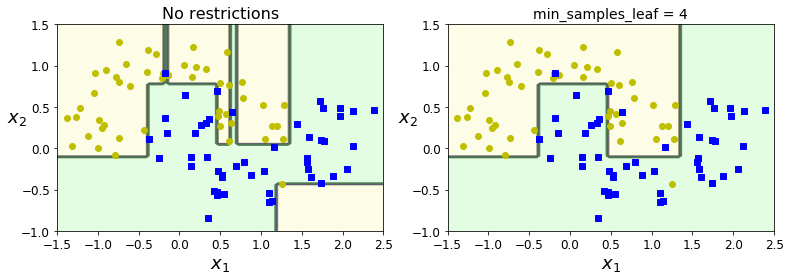

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

# 8. Regression

In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

**instead of predicting a class in each node, it predicts a value.**

Saving figure tree_regression_plot


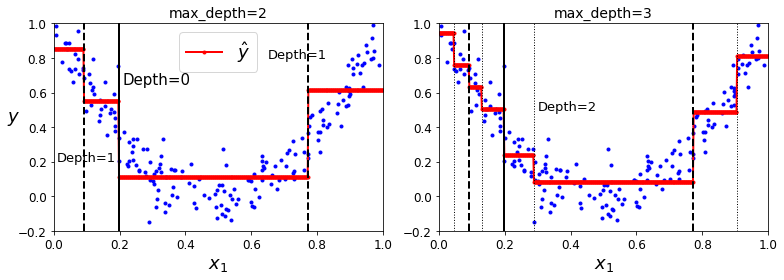

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

The CART algorithm works mostly the same way as earlier, except that instead of try‐ ing to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that **minimizes the MSE**  

**Equation 6-4: CART cost function for regression**

$
J(k, t_k) = \dfrac{m_{\text{left}}}{m}\text{MSE}_\text{left} + \dfrac{m_{\text{right}}}{m}\text{MSE}_{\text{right}} \quad
\text{where }
\begin{cases}
\text{MSE}_{\text{node}} = \sum\limits_{\scriptstyle i \in \text{node}}(\hat{y}_{\text{node}} - y^{(i)})^2\\
\hat{y}_\text{node} = \dfrac{1}{m_{\text{node}}}\sum\limits_{\scriptstyle i \in \text{node}}y^{(i)}
\end{cases}
$


In [16]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Saving figure tree_regression_regularization_plot


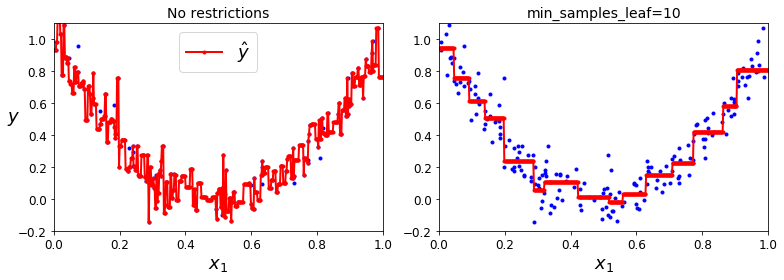

In [17]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

# 9. Instability
Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.   
![](https://tva1.sinaimg.cn/large/006y8mN6gy1g92jrpb8yaj311o0femy9.jpg)


**main issue**  
they are very sensitive to small variations in the training data